<a href="https://colab.research.google.com/github/SERVIR/flood_mapping_intercomparison/blob/main/notebooks/Module_7_Accuracy_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The goal of this module is to take the flood maps that we obtained from the global products, mosaic them, clip them, and assign to them all common raster values.

Each of the products has their own unique raster values, which can be seen in [this table](https://docs.google.com/spreadsheets/d/15igmiH1EHjtiyprgx6LnF78lvNh2scZSnlc12ySr0PQ/edit?usp=sharing). This script will take each product and reassign its raster values to the following raster value scheme:

Pixel Value            |        Land Cover Class
---                    | :---:
0                      |  Nonwater
1                      |  Water
2                      |  Masked (e.g. cloud, cloud shadow)

**Table 1: Pixel Values Used for SERVIR's Flood Mapping Intercomparison Project**

### MODIFIABLE VARIABLE ALERT

Change the variables below to match your Google Earth Engine project and the Google Earth Engine Folder where you uploaded the flood maps we exported at the end of Module 2.

In [ ]:
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd drive/My Drive

/content/drive/My Drive


In [ ]:
#cd Flood_Intercomparison/Case_Studies/semifinal

In [ ]:
ls v4*

v4_semifinal_master_stats.csv  v4_semifinal_master_stats.gsheet


In [ ]:
df = pd.read_csv('v4_semifinal_master_stats.csv')
#df = pd.read_csv('testing_0618_v8.csv')

In [ ]:
my_gee_project = 'servir-sco-assets'
#my_gee_folder = "users/mickymags//"

In [ ]:
#!pip install geemap

In [ ]:
df.tail()

,Flood_Event,Product,Statistic,Land_Cover,Elevation_Class,Slope_Class,Value
1609,Arkansas,VFM,Overall Accuracy,Bare,All,All,0.851852
1610,Arkansas,VFM,Precision,Bare,All,All,0.638889
1611,Arkansas,VFM,Recall,Bare,All,All,0.884615
1612,Arkansas,VFM,F1 Score,Bare,All,All,0.741935
1613,Arkansas,VFM,NMCC,Bare,All,All,0.829253


# Part 1: All Points, All Stats

In [ ]:
import matplotlib.ticker as ticker

/tmp/ipython-input-10-451409259.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = subset,
/tmp/ipython-input-10-451409259.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = subset,
/tmp/ipython-input-10-451409259.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = subset,
/tmp/ipython-input-10-451409259.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = subset,
/tmp/ipython-input-10-451409259.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = subset,


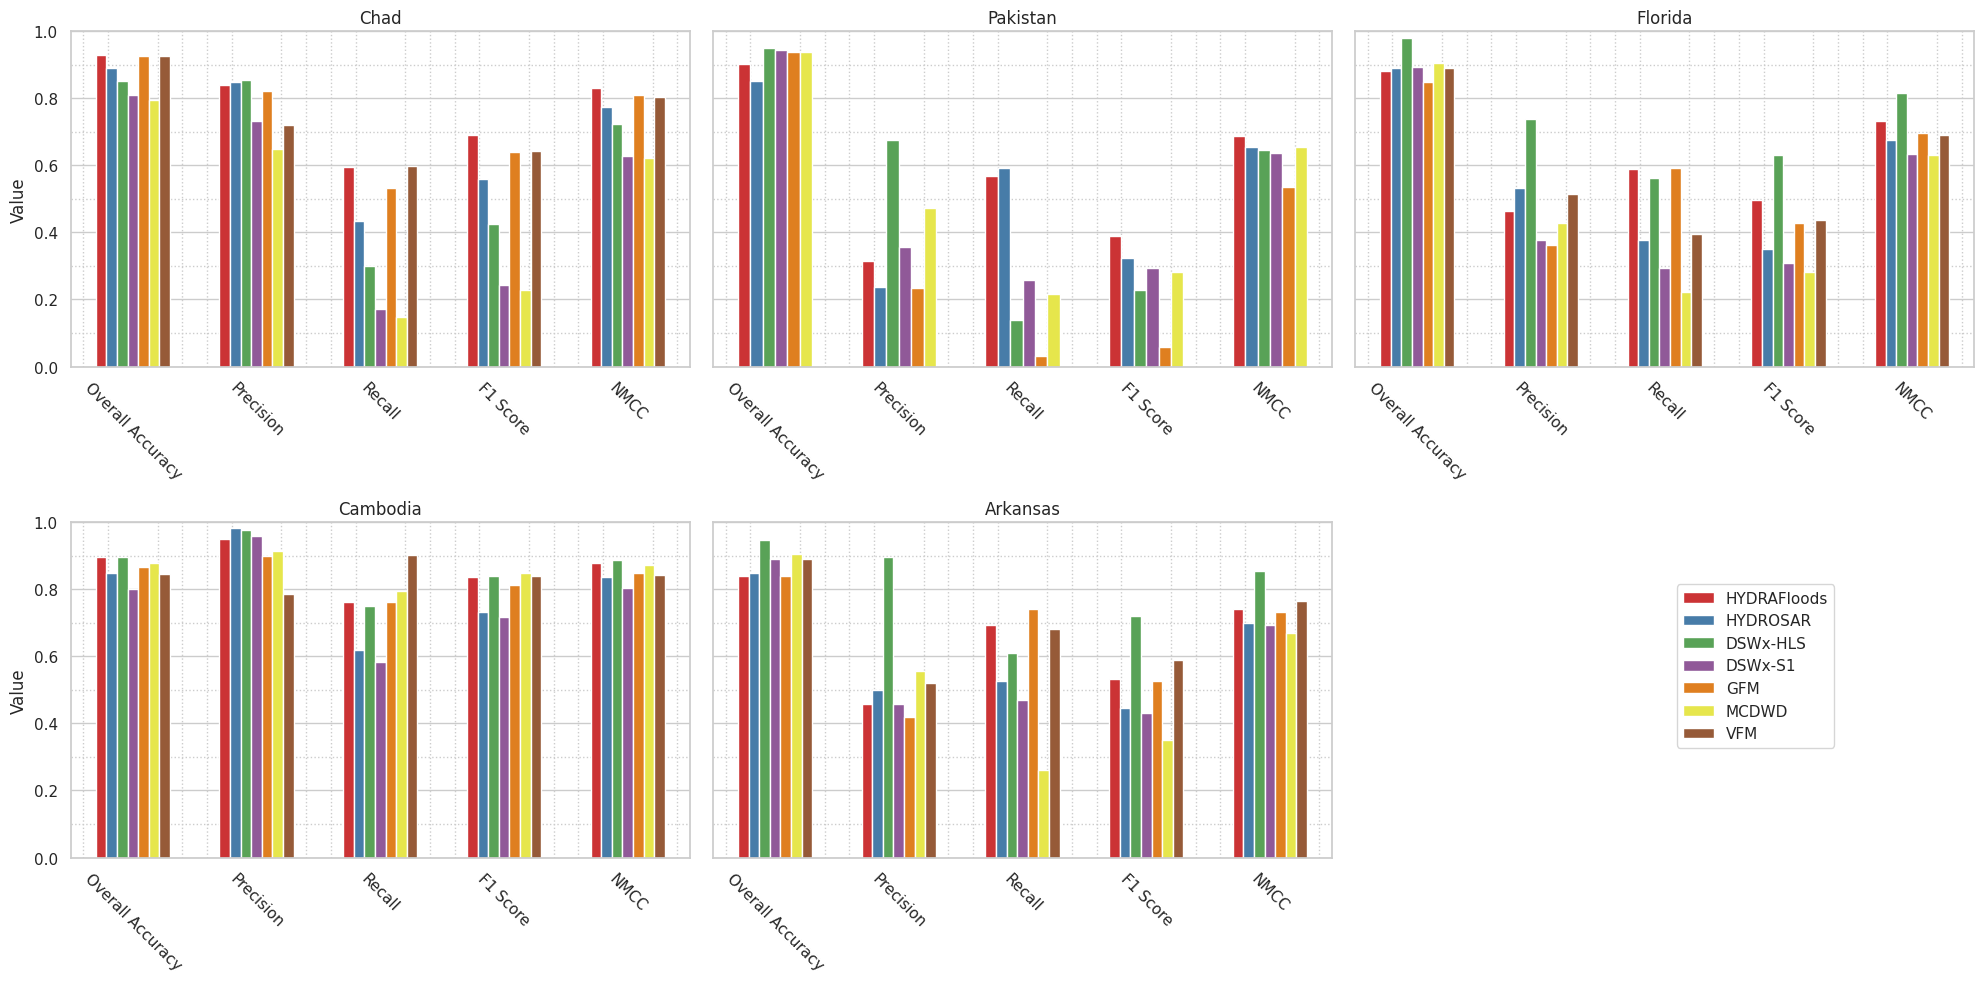

In [ ]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 10), sharey = True)
axes = axes.flatten()
# Get unique products
events = df['Flood_Event'].unique()

for i, event in enumerate(events):
  ax = axes[i]
  subset = df[df['Flood_Event'] == event]
  sns.barplot(data = subset,
              x = 'Statistic',
              y = 'Value',
              hue = 'Product',
              ax = ax,
              palette='Set1',
              width=0.6,
              ci = None)
  ax.set_title(f'{event}')
  ax.set_xlabel('')
  #ax.set_ylabel('Value')
  ax.set_ylim([0, 1])
  ax.tick_params(axis='x', rotation=-45)
  ax.legend_.remove()
  ax.minorticks_on()
  ax.grid(which='minor', linestyle=':', linewidth=1,alpha=1)
  ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
  #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

handles, labels = ax.get_legend_handles_labels()

fig.delaxes(axes[-1])
fig.legend(handles, labels, loc= 'center right', bbox_to_anchor=(0.925, 0.325))
plt.tight_layout()
plt.savefig('stats_firstlook.png')

plt.show()

# Part 2: Land Cover

* Each subplot will be a different case study
* Within each plot, products will be represented by a different color
* Different groups will be a different land cover
* Overall Accuracy or Recall will be on the y-axis.
  * Subset data to get accuracy only
  * x = 'Land Cover'

/tmp/ipython-input-11-4164388589.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = subset,
/tmp/ipython-input-11-4164388589.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = subset,
/tmp/ipython-input-11-4164388589.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = subset,
/tmp/ipython-input-11-4164388589.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = subset,
/tmp/ipython-input-11-4164388589.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = subset,


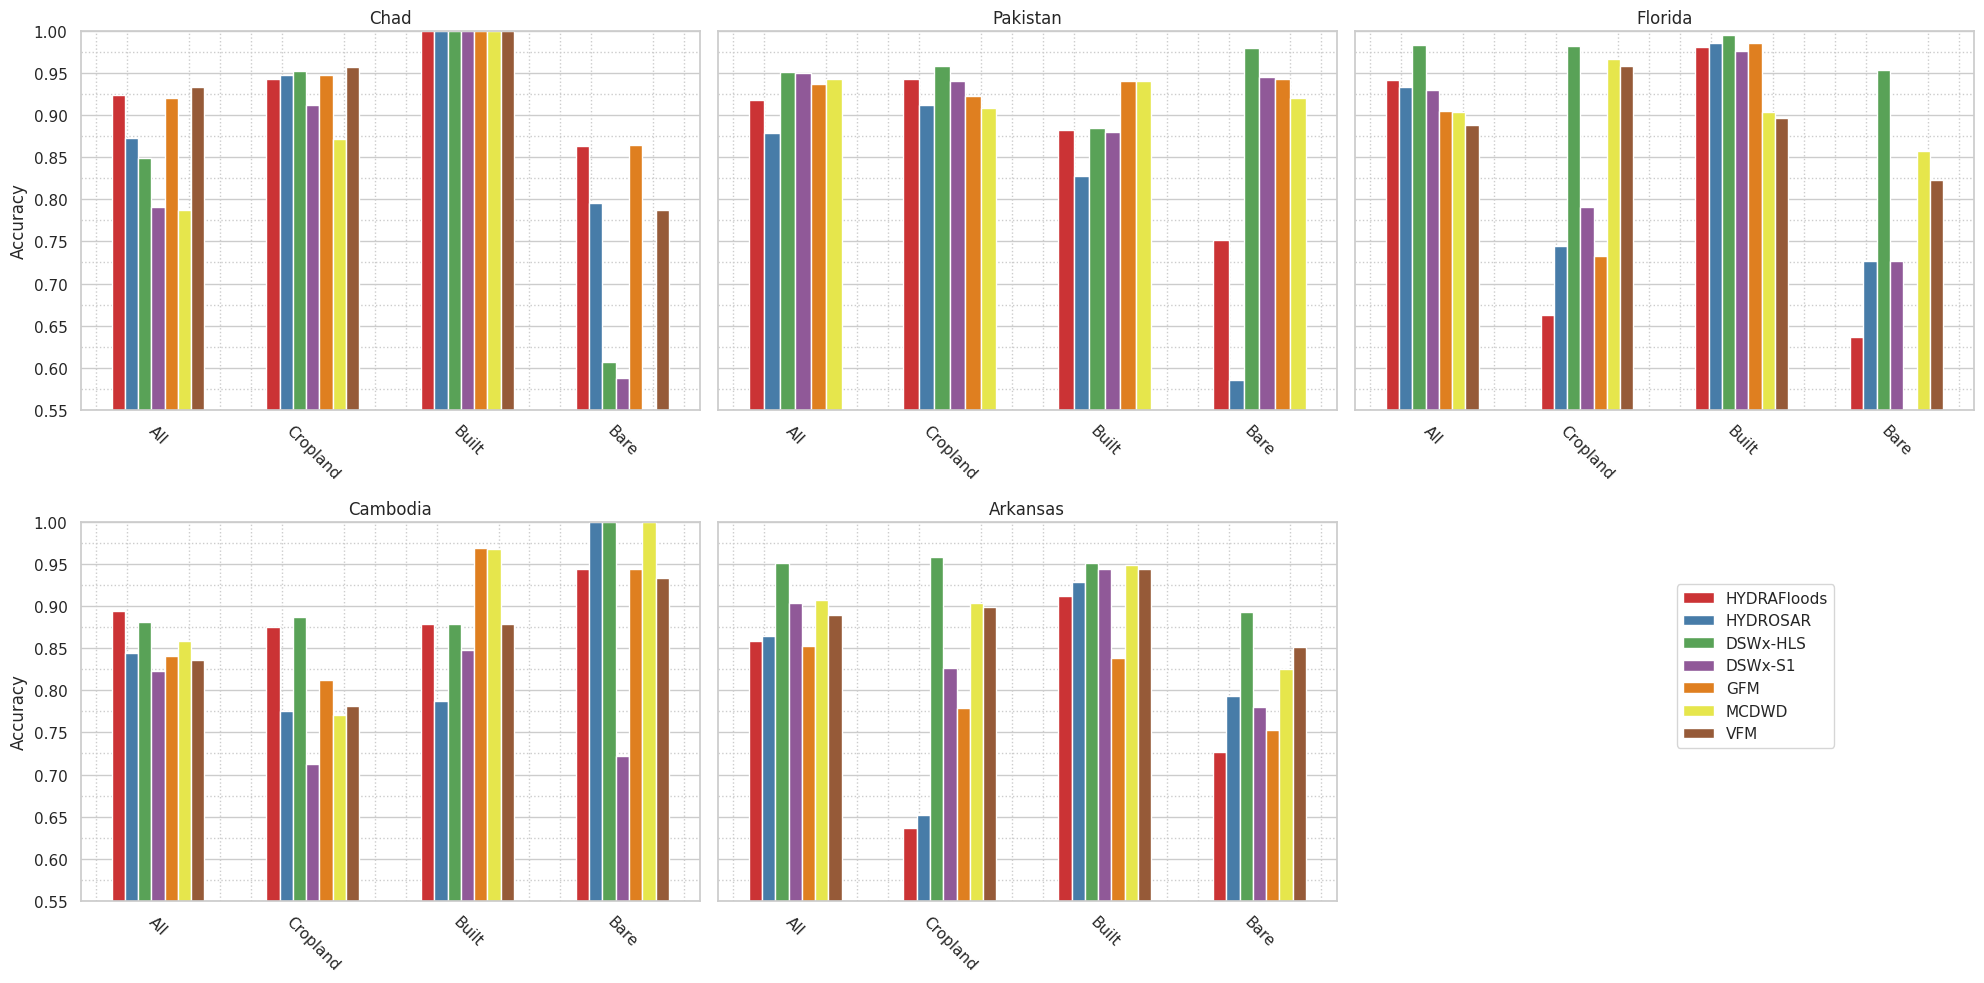

In [ ]:
# Get only accuracy statistics
df_acc = df[df['Statistic'] == 'Overall Accuracy']

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 10), sharey = True)
axes = axes.flatten()
# Get unique products
events = df['Flood_Event'].unique()

for i, event in enumerate(events):
  ax = axes[i]
  subset = df_acc[df_acc['Flood_Event'] == event]
  sns.barplot(data = subset,
              x = 'Land_Cover',
              y = 'Value',
              hue = 'Product',
              ax = ax,
              palette='Set1',
              width=0.6,
              ci = None)
  ax.set_title(f'{event}')
  ax.set_xlabel('')
  ax.set_ylabel('Accuracy')
  ax.set_ylim([0.55, 1])
  ax.tick_params(axis='x', rotation=-45)
  ax.legend_.remove()
  ax.minorticks_on()
  ax.grid(which='minor', linestyle=':', linewidth=1,alpha=1)
  ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
  #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

handles, labels = ax.get_legend_handles_labels()

fig.delaxes(axes[-1])
fig.legend(handles, labels, loc= 'center right', bbox_to_anchor=(0.925, 0.325))
plt.tight_layout()
plt.savefig('stats_firstlook.png')

plt.show()

Let's do the same visualization, but this time using precision instead of accuracy

/tmp/ipython-input-12-3131935789.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = subset,
/tmp/ipython-input-12-3131935789.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = subset,
/tmp/ipython-input-12-3131935789.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = subset,
/tmp/ipython-input-12-3131935789.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = subset,
/tmp/ipython-input-12-3131935789.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = subset,


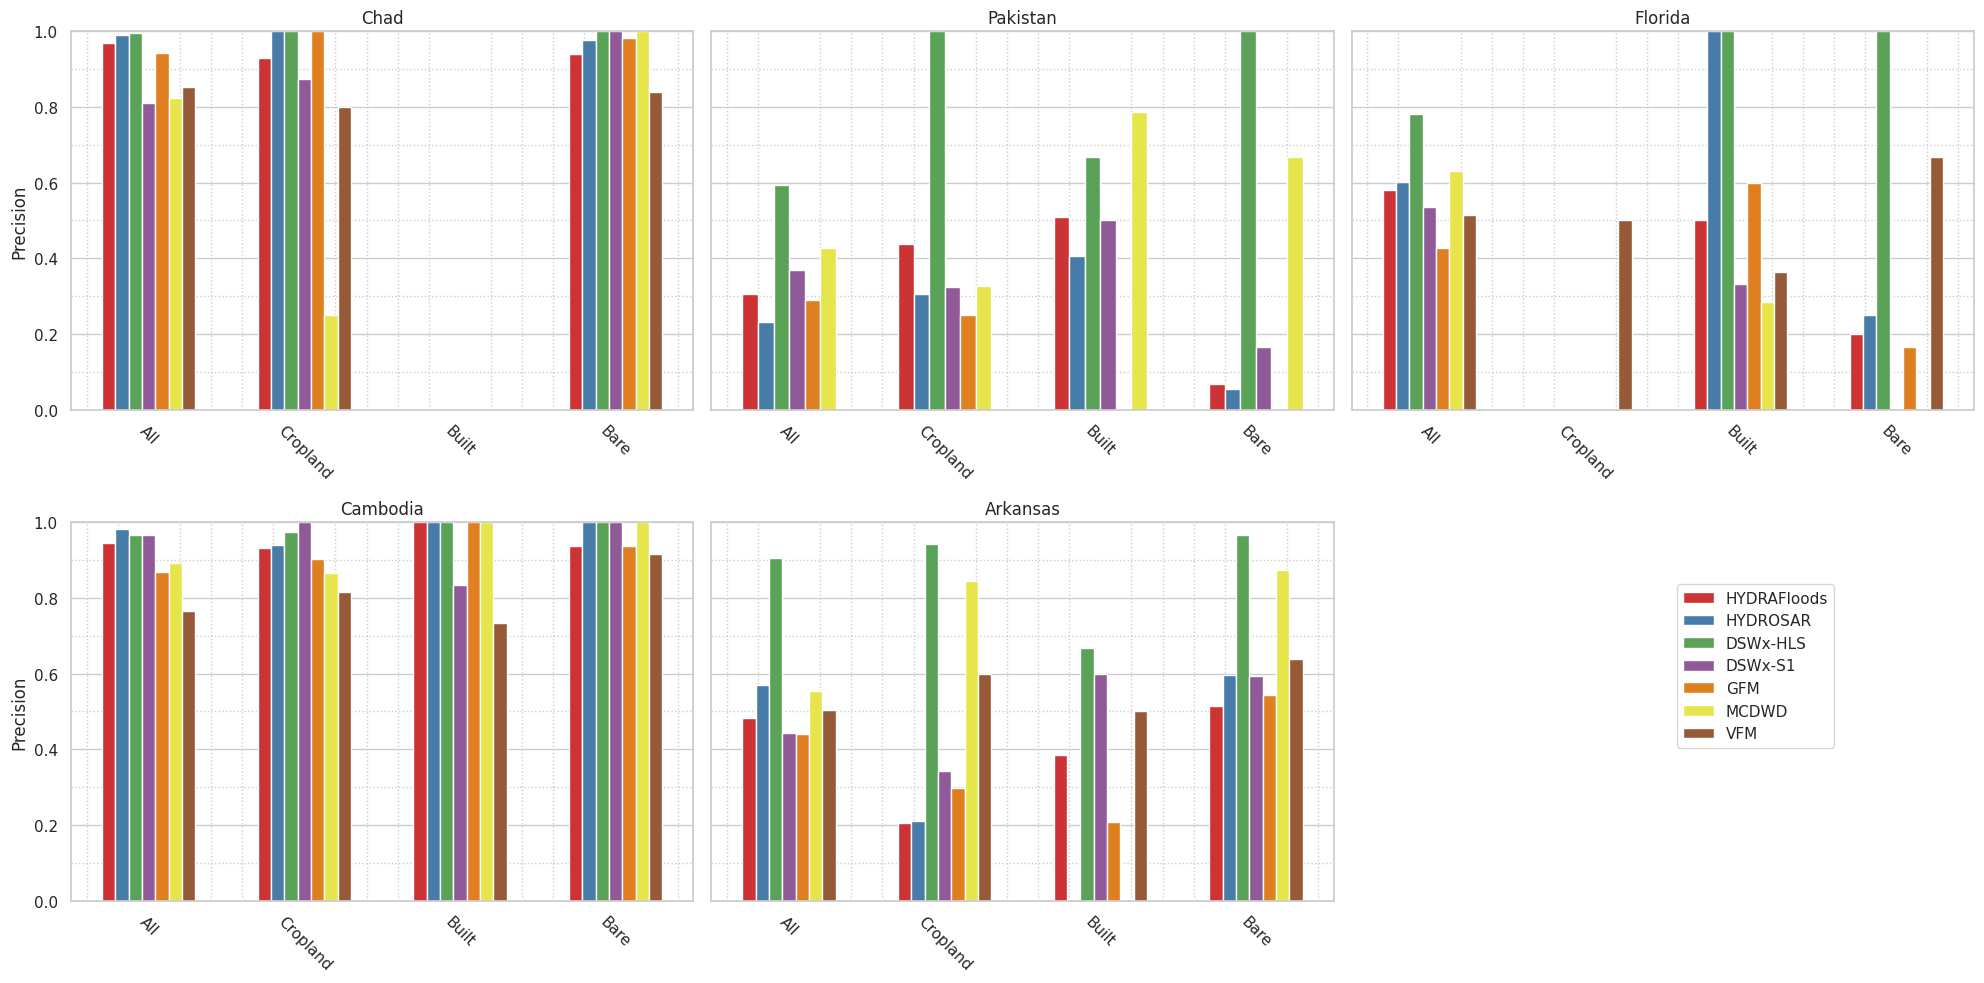

In [ ]:
# Get only accuracy statistics
df_acc = df[df['Statistic'] == 'Precision']

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 10), sharey = True)
axes = axes.flatten()
# Get unique products
events = df['Flood_Event'].unique()

for i, event in enumerate(events):
  ax = axes[i]
  subset = df_acc[df_acc['Flood_Event'] == event]
  sns.barplot(data = subset,
              x = 'Land_Cover',
              y = 'Value',
              hue = 'Product',
              ax = ax,
              palette='Set1',
              width=0.6,
              ci = None)
  ax.set_title(f'{event}')
  ax.set_xlabel('')
  ax.set_ylabel('Precision')
  ax.set_ylim([0, 1])
  ax.tick_params(axis='x', rotation=-45)
  ax.legend_.remove()
  ax.minorticks_on()
  ax.grid(which='minor', linestyle=':', linewidth=1,alpha=1)
  ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
  #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

handles, labels = ax.get_legend_handles_labels()

fig.delaxes(axes[-1])
fig.legend(handles, labels, loc= 'center right', bbox_to_anchor=(0.925, 0.325))
plt.tight_layout()
plt.savefig('stats_firstlook.png')

plt.show()

# Part 3: Slope

# Part 4: Elevation

# DEPRECATED

In [ ]:
'''
sns.set_theme(style="whitegrid")


plt.figure(figsize = (12, 12))

ax = sns.catplot(
    data = df,
    kind = 'bar',
    x = 'Statistic', #'Product',
    y = 'Value',
    hue = 'Product', #'Statistic',
    #errorbar = 'sd',
    palette = "muted",
    #alpha = 0.61,
    #height = 6
)

plt.title('Stats Disaggregated by Product')
plt.xlabel('Flood Products')
plt.ylabel('Statistic Value')
ax.set_xticklabels(rotation=-45)

#g.despine(left=True)
#g.set_axis_labels("", "Statistic Value")
#g.legend.set_title("")
#g.tight_layout()
#g.set_xticklabels(rotation=45)
'''

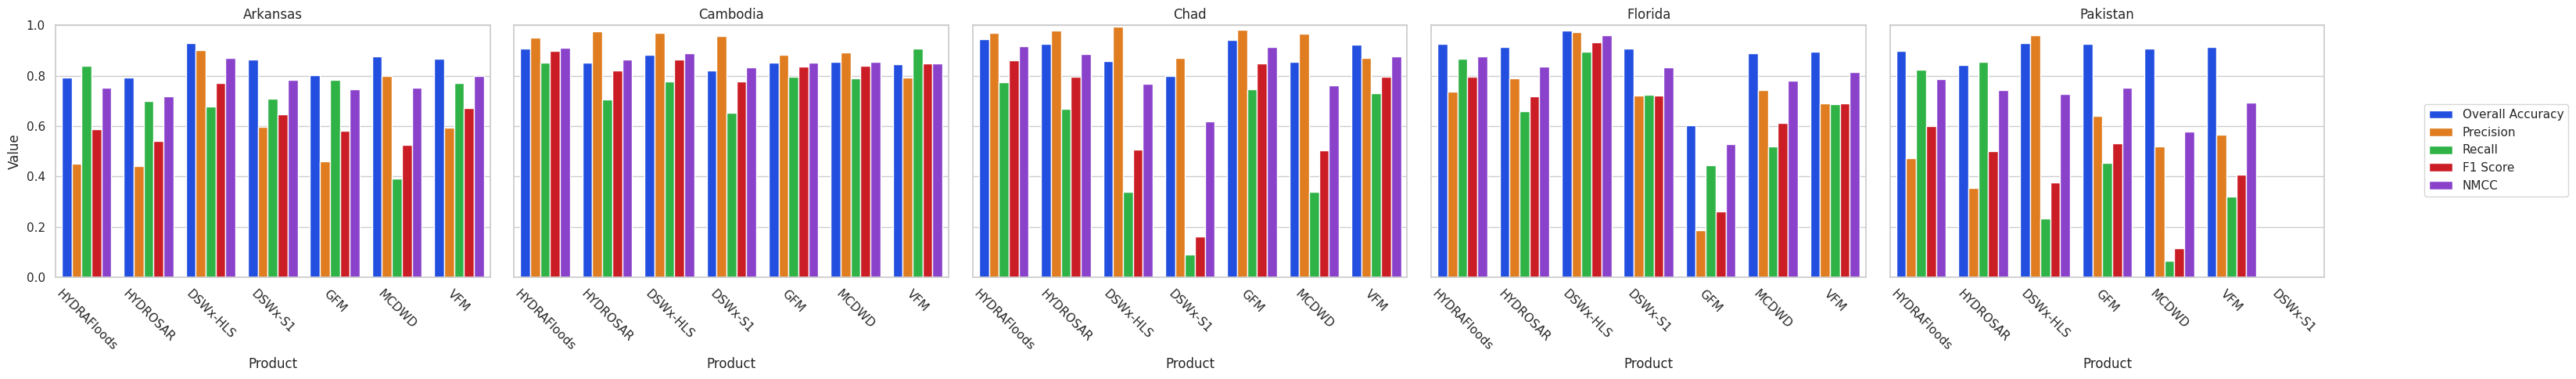

In [ ]:
'''
fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (30, 5), sharey = True)
# Get unique products
events = df['Flood_Event'].unique()

for i, event in enumerate(events):
  ax = axes[i]
  subset = df[df['Flood_Event'] == event]
  sns.barplot(data = subset,
              x = 'Product',
              y = 'Value',
              hue = 'Statistic',
              ax = ax,
              palette='bright')
  ax.set_title(f'{event}')
  #ax.set_xlabel('Product')
  ax.set_ylabel('Value')
  ax.set_ylim([0, 1])
  ax.tick_params(axis='x', rotation=-45)
  ax.legend_.remove()
  #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

handles, labels = ax.get_legend_handles_labels()

fig.legend(handles, labels, loc= 'center right', bbox_to_anchor=(1.1, 0.6))
plt.tight_layout()
plt.savefig('stats_firstlook.png')

plt.show()
'''

In [ ]:
'''
sns.set_theme(style="whitegrid")


plt.figure(figsize = (12, 12))

ax = sns.catplot(
    data = dummy_stats,
    kind = 'bar',
    x = 'Product',
    y = 'Value',
    hue = 'Statistic',
    #errorbar = 'sd',
    palette = "muted",
    #alpha = 0.61,
    #height = 6
)

plt.title('Dummy Stats')
plt.xlabel('Flood Products')
plt.ylabel('Statistic Value')
ax.set_xticklabels(rotation=-45)

#g.despine(left=True)
#g.set_axis_labels("", "Statistic Value")
#g.legend.set_title("")
#g.tight_layout()
#g.set_xticklabels(rotation=45)
'''

In [ ]:
'''
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data = penguins,
    kind = 'bar',
    x = 'species',
    y = 'body_mass_g',
    hue = 'sex',
    errorbar = 'sd',
    palette = "dark",
    alpha = 0.6,
    height = 6
)

g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")
'''

In [ ]:
'''
sns.set_theme(style="whitegrid")


plt.figure(figsize = (12, 12))

ax = sns.catplot(
    data = df,
    kind = 'bar',
    x = 'Product',
    y = 'Value',
    hue = 'Statistic',
    #errorbar = 'sd',
    palette = "muted",
    #alpha = 0.61,
    #height = 6
)

plt.title('Stats Disaggregated by Statistic')
plt.xlabel('Flood Products')
plt.ylabel('Statistic Value')
ax.set_xticklabels(rotation=-45)

#g.despine(left=True)
#g.set_axis_labels("", "Statistic Value")
#g.legend.set_title("")
#g.tight_layout()
'''